pre-requisite:
```
$ test_performance.py > perf.json
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

with open("perf.json") as fh:
    data = json.load(fh)

pprint(data)


{'func0': {'func0': 0.018734308200509985,
           'func0_decorated': 0.08898689999914496,
           'func0_def': 0.1339826916002494,
           'func0_fpo': 0.2459962415996415},
 'func1': {'func1': 0.01856767499994021,
           'func1_decorated': 0.09132016639996436,
           'func1_def': 0.3752400168006716,
           'func1_fpo': 0.2472970083996188},
 'func5': {'func5': 0.021457791599823396,
           'func5_decorated': 0.09732464140179217,
           'func5_def': 0.38305772499952584,
           'func5_fpo': 0.25315180859906833}}


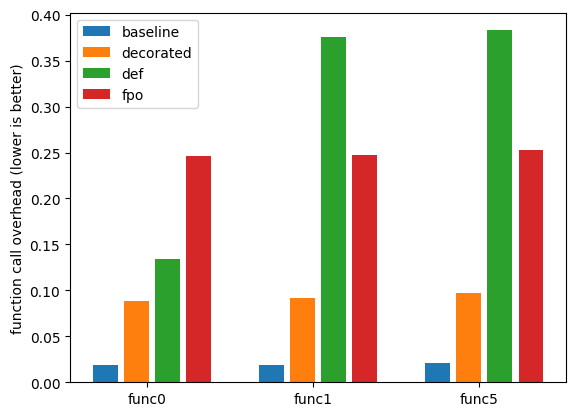

In [2]:
fig, ax = plt.subplots()
bar_width=0.75
ntypes = len(data["func0"])
offset = bar_width / ntypes

for i in range(ntypes):
    x = np.arange(3) + i * offset
    y = [list(dat.values())[i] for dat in data.values()]

    label = list(data["func0"].keys())[i].removeprefix("func0_")
    if label == "func0":
        label = "baseline"
    ax.bar(x, y, width=bar_width/5, label=label)

ax.set_xticks([0.25, 1.25, 2.25])
ax.set_xticklabels(list(data.keys()))

ax.set_ylabel("function call overhead (lower is better)")

ax.legend()